## <span style="color : green"> Single Layer Perceptron </span>

# <center> Table of Contents </center>

1. Train a single layer perceptron model and determine the minimum error below 0.2
2. To compute the final weight of each attribute
1. To plot the epooch vs error plot

In [16]:
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from warnings import filterwarnings 

filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Datasets/penguins.csv', index_col=0)
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species
rowid,,,,,,,,
1,Torgersen,39.1,18.7,181.0,3750.0,male,2007,Adelie
2,Torgersen,39.5,17.4,186.0,3800.0,female,2007,Adelie
3,Torgersen,40.3,18.0,195.0,3250.0,female,2007,Adelie
4,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,Adelie
5,Torgersen,36.7,19.3,193.0,3450.0,female,2007,Adelie


In [77]:
df.dropna(inplace=True)

In [78]:
features = df.loc[:,['bill_length_mm','flipper_length_mm','body_mass_g']]
features = features.values
label = df.iloc[:,-1:].values
encoder = LabelEncoder()
label = encoder.fit_transform(label)

xtrain, xtest, ytrain, ytest = train_test_split(features,
                                                    label,
                                                    test_size=0.30,
                                                    random_state=0)

### Train a single layer perceptron model and determine the minimum error below 0.2

In [79]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(3,)))

In [80]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer=Adam(learning_rate=0.4), \
              loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
history = model.fit(xtrain, ytrain, epochs=100, verbose=1, )

Train on 63 samples
Epoch 1/100
63/63 [==============================] - 0s 455us/sample - loss: 13.6814 - accuracy: 0.7619
Epoch 2/100
63/63 [==============================] - 0s 71us/sample - loss: 12.5720 - accuracy: 0.7619
Epoch 3/100
63/63 [==============================] - 0s 71us/sample - loss: 16.6654 - accuracy: 0.6667
Epoch 4/100
63/63 [==============================] - 0s 65us/sample - loss: 14.7126 - accuracy: 0.7619
Epoch 5/100
63/63 [==============================] - 0s 78us/sample - loss: 25.4146 - accuracy: 0.6349
Epoch 6/100
63/63 [==============================] - 0s 60us/sample - loss: 15.9394 - accuracy: 0.7619
Epoch 7/100
63/63 [==============================] - 0s 63us/sample - loss: 9.7335 - accuracy: 0.7937
Epoch 8/100
63/63 [==============================] - 0s 61us/sample - loss: 9.1156 - accuracy: 0.7937
Epoch 9/100
63/63 [==============================] - 0s 92us/sample - loss: 9.7424 - accuracy: 0.8095
Epoch 10/100
63/63 [==============================] - 0

63/63 [==============================] - 0s 49us/sample - loss: 70.8585 - accuracy: 0.6349
Epoch 80/100
63/63 [==============================] - 0s 59us/sample - loss: 47.4620 - accuracy: 0.6190
Epoch 81/100
63/63 [==============================] - 0s 60us/sample - loss: 44.0646 - accuracy: 0.6667
Epoch 82/100
63/63 [==============================] - 0s 77us/sample - loss: 22.9720 - accuracy: 0.7143
Epoch 83/100
63/63 [==============================] - 0s 71us/sample - loss: 17.7974 - accuracy: 0.8254
Epoch 84/100
63/63 [==============================] - 0s 75us/sample - loss: 42.8863 - accuracy: 0.5397
Epoch 85/100
63/63 [==============================] - 0s 50us/sample - loss: 32.9654 - accuracy: 0.6984
Epoch 86/100
63/63 [==============================] - 0s 78us/sample - loss: 22.7783 - accuracy: 0.7619
Epoch 87/100
63/63 [==============================] - 0s 74us/sample - loss: 24.7782 - accuracy: 0.7302
Epoch 88/100
63/63 [==============================] - 0s 71us/sample - loss: 

In [83]:
loss, accuracy = model.evaluate(xtest, ytest, verbose = 0)
print(f'\n\nLoss: {loss}, Accuracy: {accuracy}')



Loss: 24.991989135742188, Accuracy: 0.6666666865348816


In [86]:
ypred = model.predict(xtest)

### To compute the final weight of each attribute

In [87]:
print(model.get_weights())

[array([[-2.1627753 ],
       [-3.3834507 ],
       [ 0.16183503]], dtype=float32), array([-6.940952], dtype=float32)]


### To plot the epooch vs error plot

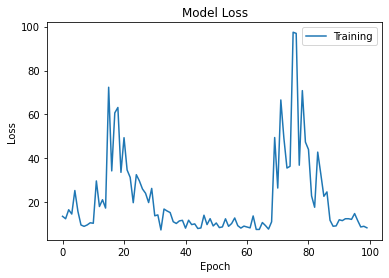

In [98]:
# Loss or Error

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training'])
plt.show()

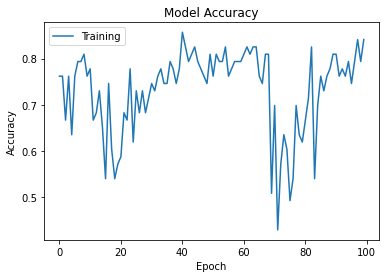

In [97]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training'])
plt.show()